In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import env
import wrangle
import acquire
import prepare

In [2]:
df = pd.read_csv('zillow.csv')

In [3]:
df.shape

(77579, 69)

In [4]:
df['isdupe'] = df.duplicated(subset=['parcelid'])

In [5]:
df.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,isdupe
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,False
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,False
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,False
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,False
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,False


In [6]:
df_nodupe = df[df.isdupe == False]

In [7]:
df_nodupe.shape

(77381, 70)

In [8]:
df_nodupe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77578
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   propertylandusetypeid         77381 non-null  float64
 4   heatingorsystemtypeid         49440 non-null  float64
 5   buildingclasstypeid           15 non-null     float64
 6   architecturalstyletypeid      206 non-null    float64
 7   airconditioningtypeid         24953 non-null  float64
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [9]:
df_nodupe.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77381.0,1.300715e+07,3.481346e+06,1.071186e+07,1.153830e+07,1.253157e+07,1.421183e+07,1.676893e+08
typeconstructiontypeid,222.0,6.040541e+00,5.572847e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77381.0,2.618263e+02,5.141199e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49440.0,3.920510e+00,3.592779e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,206.0,7.388350e+00,2.734542e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,24953.0,1.813289e+00,2.967894e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
id,77381.0,1.495139e+06,8.609071e+05,3.490000e+02,7.520700e+05,1.497932e+06,2.240535e+06,2.982274e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


In [10]:
df_nodupe.isna()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,isdupe
0,False,True,True,False,True,True,True,True,False,True,...,False,False,True,True,True,True,False,True,True,False
1,False,True,True,False,True,True,True,True,False,True,...,False,False,True,True,True,True,False,True,True,False
2,False,True,True,False,True,True,True,True,False,True,...,False,False,True,True,True,True,False,True,True,False
3,False,True,True,False,False,True,True,True,False,True,...,False,False,True,True,True,False,False,True,True,False
4,False,True,True,False,False,True,True,False,False,True,...,False,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77574,False,True,True,False,False,True,True,False,False,True,...,False,False,False,True,True,False,False,True,True,False
77575,False,True,True,False,False,True,True,True,False,True,...,False,False,True,True,True,False,False,True,True,False
77576,False,True,True,False,True,True,True,True,False,True,...,False,False,True,True,True,True,False,True,True,False
77577,False,True,True,False,False,True,True,False,False,True,...,False,False,False,True,True,False,False,True,True,False


In [33]:
def na_stats(df):
    odf = pd.DataFrame({'features': list(df.columns)})
    num_na = []
    percent_na = []
    for col in df.columns:
        num_na.append(df[col].isna().sum())
        percent_na.append((df[col].isna().sum()/len(df[col])))
    odf['num_na'] = num_na         
    odf['percent_na'] = percent_na
        
    return odf



In [34]:
odf = na_stats(df_nodupe)

odf

,features,num_na,percent_na
0,parcelid,0,0.000000
1,typeconstructiontypeid,77159,0.997131
2,storytypeid,77331,0.999354
3,propertylandusetypeid,0,0.000000
4,heatingorsystemtypeid,27941,0.361083
5,buildingclasstypeid,77366,0.999806
6,architecturalstyletypeid,77175,0.997338
7,airconditioningtypeid,52428,0.677531
8,id,0,0.000000
9,basementsqft,77331,0.999354


In [13]:
df_nodupe.shape

(77381, 70)

In [14]:
def gap_killer(df):
    to_drop = []
    col_count = na_stats(df)
    for index, row in col_count.iterrows():
        if row['percent_na'] >= .60:
            to_drop.append(index)
        out_df = df.drop(df.columns[to_drop], axis = 1)
    null_row = out_df.isnull().sum(axis=1)
    out_df['nulls'] = null_row
    out_df = out_df[out_df['nulls'] < 9]
    
    return out_df
        

In [15]:
col_cull = gap_killer(df_nodupe)

In [16]:
col_cull.shape

(77185, 37)

In [17]:
col_cull.head(60)

,parcelid,propertylandusetypeid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,isdupe,nulls
0,14297519,261.0,NaN,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,NaN,Single Family Residential,False,5
1,17052889,261.0,NaN,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,NaN,Single Family Residential,False,5
2,14186244,261.0,NaN,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,NaN,Single Family Residential,False,5
3,12177905,261.0,2.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential,False,0
4,10887214,266.0,2.0,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium,False,0
5,17143294,266.0,NaN,1447245,2.0,3.0,NaN,2.0,1492.0,1492.0,...,132424.0,3508.10,6.111005e+13,5,-0.020526,2017-01-01,NaN,Condominium,False,5
6,12095076,261.0,2.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Central,Single Family Residential,False,0
7,12069064,261.0,NaN,870991,1.0,2.0,5.0,1.0,738.0,738.0,...,199662.0,2366.08,6.037302e+13,7,0.101723,2017-01-01,NaN,Single Family Residential,False,2
8,12790562,261.0,2.0,1246926,3.0,4.0,9.0,3.0,3039.0,3039.0,...,43056.0,3104.19,6.037500e+13,8,-0.040966,2017-01-02,Central,Single Family Residential,False,0
9,11542646,266.0,2.0,1585097,3.0,2.0,8.0,3.0,1290.0,1290.0,...,220058.0,4557.32,6.037275e+13,9,-0.036763,2017-01-02,Central,Condominium,False,0


In [18]:
sql_url = wrangle.get_connection('mall_customers')

In [19]:
query = '''
        SELECT *
        FROM customers
        '''

In [20]:
mall_df = pd.read_sql(query, sql_url)
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
mall_df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [23]:
mall_df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


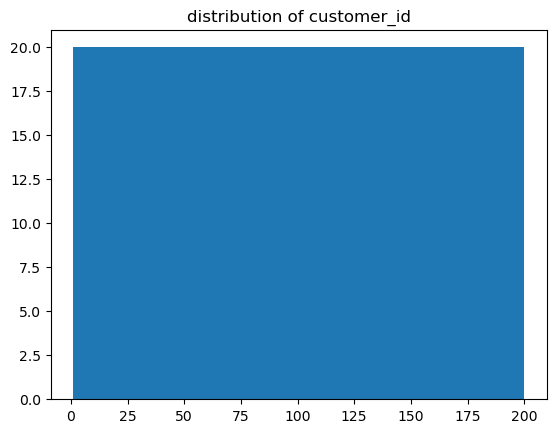

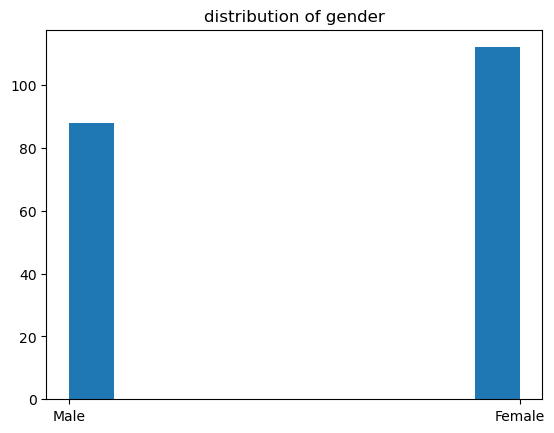

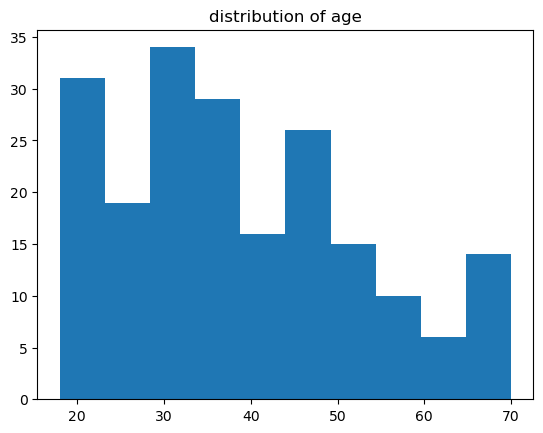

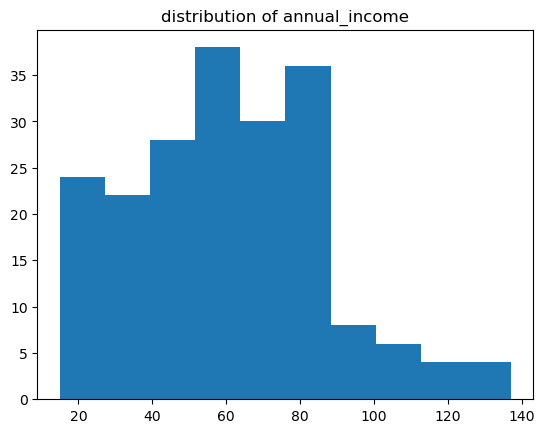

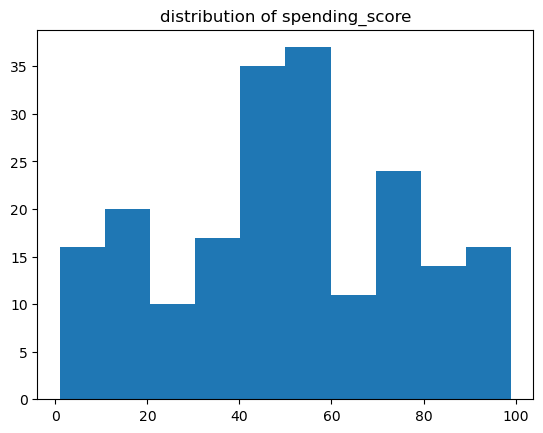

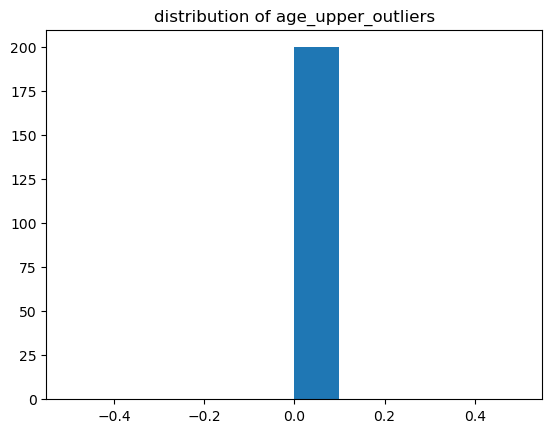

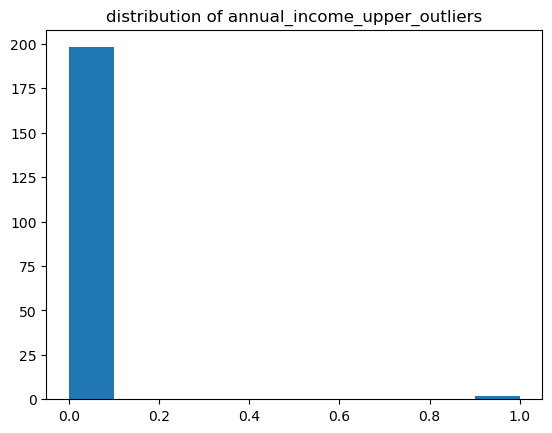

In [35]:
num_cols = mall_df.columns.to_list()

for col in num_cols:
    plt.hist(mall_df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [36]:
def upper_outlier_detector(dataframe, column, k = 1.5):
    q1 , q3 = dataframe[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return np.where(dataframe[column]> upper_bound, 1, 0)

In [37]:
my_list = ['age', 'annual_income']

In [38]:
for col in my_list:
    mall_df[f'{col}_upper_outliers'] = upper_outlier_detector(mall_df, col)
    
mall_df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [40]:
num_df = mall_df.select_dtypes(exclude = object)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   customer_id                   200 non-null    int64
 1   age                           200 non-null    int64
 2   annual_income                 200 non-null    int64
 3   spending_score                200 non-null    int64
 4   age_upper_outliers            200 non-null    int64
 5   annual_income_upper_outliers  200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [29]:
train, val, test = prepare.train_val_test(mall_df)

In [31]:
train.shape

(140, 7)

In [32]:
mall_df.shape

(200, 7)